In [58]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("../data/train.csv")

In [59]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [61]:
def preprocess_basic(df): 

    import pandas as pd
    
    df = df.copy()

    #categorizing columns 
    df = df.drop(columns = ['Name'], errors = 'ignore')
    cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
    num_gaussian = ['Age']
    num_spent = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    
    for col in ['Deck', 'Side']:
        if col in df.columns:
            cat_cols.append(col)
            
    #filling in null values
    from sklearn.impute import SimpleImputer
    df[num_gaussian] = SimpleImputer(strategy = 'median').fit_transform(df[num_gaussian])
    #simple imputer used for age as it has normal distribution
            
    from sklearn.impute import KNNImputer
    df[num_spent] = KNNImputer(n_neighbors = 4, weights = 'distance').fit_transform(df[num_spent])
    #add_indicator not used because extra columns will be added and it will be more complex 

    df[cat_cols] = SimpleImputer(strategy = 'most_frequent').fit_transform(df[cat_cols])
    for col in ['CryoSleep', 'VIP']:
        if col in df.columns:
            df[col] = df[col].astype(bool)

    #encoding categorical data
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(handle_unknown = 'ignore', drop = 'first', sparse_output = False)
    cat_cols_encoded = ohe.fit_transform(df[cat_cols])
    cat_cols_encoded = pd.DataFrame(cat_cols_encoded, columns = ohe.get_feature_names_out(cat_cols), index = df.index)
    df = df.drop(columns = cat_cols)
    df = df.drop(columns = ['Cabin', 'CabinNumber'])
    df = pd.concat([df, cat_cols_encoded], axis = 1)
    
    #scaling numerical data
    from sklearn.preprocessing import StandardScaler
    df[num_gaussian] = StandardScaler().fit_transform(df[num_gaussian])
    
    from sklearn.preprocessing import MinMaxScaler
    df[num_spent] = MinMaxScaler().fit_transform(df[num_spent])

    return df

In [62]:
df_processed = feature_engineering(df)
df_processed = preprocess_basic(df)

df_processed.info()
df_processed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   Age                        8693 non-null   float64
 2   RoomService                8693 non-null   float64
 3   FoodCourt                  8693 non-null   float64
 4   ShoppingMall               8693 non-null   float64
 5   Spa                        8693 non-null   float64
 6   VRDeck                     8693 non-null   float64
 7   Transported                8693 non-null   bool   
 8   Group                      8693 non-null   object 
 9   GroupSize                  8693 non-null   int64  
 10  HomePlanet_Europa          8693 non-null   float64
 11  HomePlanet_Mars            8693 non-null   float64
 12  CryoSleep_True             8693 non-null   float64
 13  Destination_PSO J318.5-22  8693 non-null   float

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,GroupSize,...,Destination_TRAPPIST-1e,VIP_True,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0001_01,0.711945,0.000000,0.000000,0.000000,0.000000,0.000000,False,0001,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,-0.334037,0.007608,0.000302,0.001064,0.024500,0.001823,True,0002,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0003_01,2.036857,0.003001,0.119948,0.000000,0.299670,0.002030,False,0003,2,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0003_02,0.293552,0.000000,0.043035,0.015793,0.148563,0.007997,False,0003,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0004_01,-0.891895,0.021149,0.002348,0.006428,0.025214,0.000083,True,0004,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [63]:
import seaborn as sns 

Text(0.5, 1.0, 'HomePlanet vs Transported')

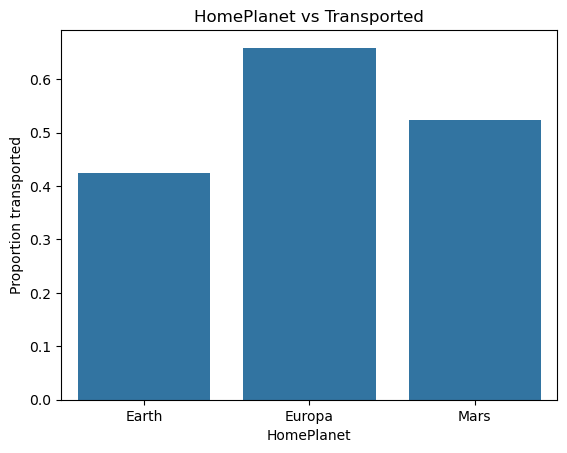

In [64]:
#home planet vs transported 
plot_hp = df.groupby('HomePlanet')['Transported'].mean().reset_index()
sns.barplot(x = 'HomePlanet', y = 'Transported', data = plot_hp, errorbar = None)
plt.ylabel('Proportion transported')
plt.title('HomePlanet vs Transported')
#it is clear that passengers from Europa were transported the most followed by Mars and least from Earth

Text(0.5, 1.0, 'CryoSleep vs Transported')

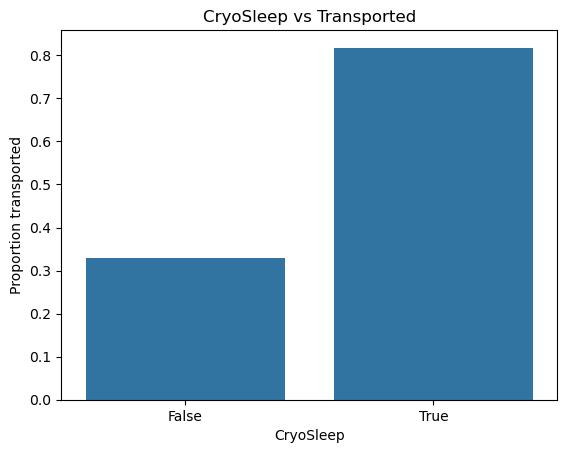

In [65]:
#cryosleep vs transported 
plot_cs = df.groupby('CryoSleep')['Transported'].mean().reset_index()
sns.barplot(x = 'CryoSleep', y = 'Transported', data = plot_cs, errorbar = None)
plt.ylabel('Proportion transported')
plt.title('CryoSleep vs Transported')
#cryosleep has a much higher transportation rate when true

Text(0.5, 1.0, 'Destination vs Transported')

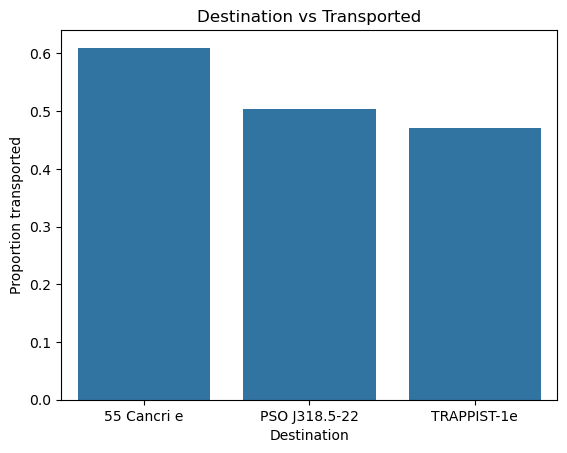

In [66]:
#destination vs transported 
plot_dst = df.groupby('Destination')['Transported'].mean().reset_index()
sns.barplot(x = 'Destination', y = 'Transported', data = plot_dst, errorbar = None)
plt.ylabel('Proportion transported')
plt.title('Destination vs Transported')
#passengers going to 55 Cancri e had a higher chance of being transported follwed by PSO J318.5-22
#that is followed closely by TRAPPIST-1e

Text(0.5, 1.0, 'VIP vs Transported')

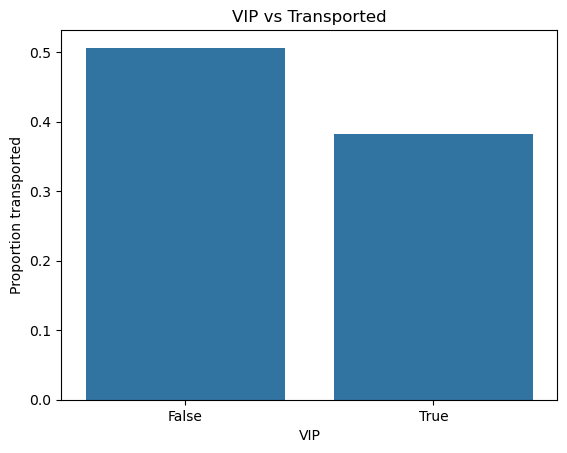

In [67]:
#vip vs transported 
plot_vip = df.groupby('VIP')['Transported'].mean().reset_index()
sns.barplot(x = 'VIP', y = 'Transported', data = plot_vip, errorbar = None)
plt.ylabel('Proportion transported')
plt.title('VIP vs Transported')
#passengers who weren't given VIP status had a higher chance of being transported 

Text(0.5, 1.0, 'Deck vs Transported')

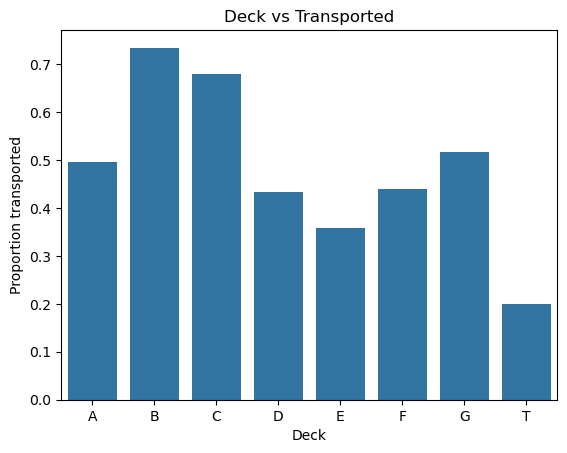

In [68]:
#deck vs transported 
plot_deck = df.groupby('Deck')['Transported'].mean().reset_index()
sns.barplot(x = 'Deck', y = 'Transported', data = plot_deck, errorbar = None)
plt.ylabel('Proportion transported')
plt.title('Deck vs Transported')
#passengers from deck B had the highest chances of being transported followed closely by ones from deck C 
#passengers from decks A and G had alomst the same medium chance of transportation 
#passengers from decks D and F also had almost the same chance of transportation, but less than that of A and G
#passengers from deck E had a low chance of transportation and the lowest was from deck T

Text(0.5, 1.0, 'Side vs Transported')

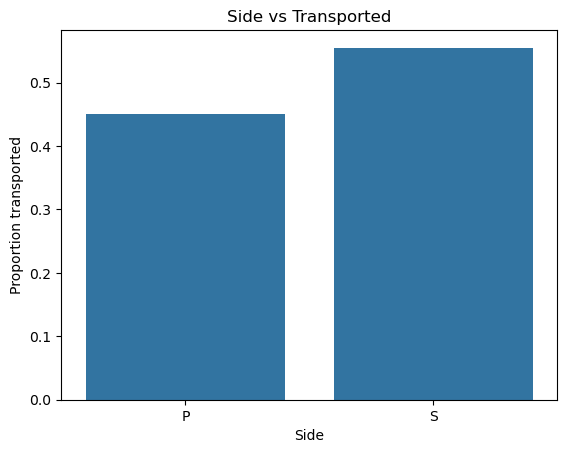

In [69]:
#side vs transported 
plot_side = df.groupby('Side')['Transported'].mean().reset_index()
sns.barplot(x = 'Side', y = 'Transported', data = plot_side, errorbar = None)
plt.ylabel('Proportion transported')
plt.title('Side vs Transported')
#passengers from starboard had a slightly higher chance of being transported than the ones from port but it was still low

Text(0.5, 1.0, 'Variation of transportation rates with both CryoSleep and HomePlanet')

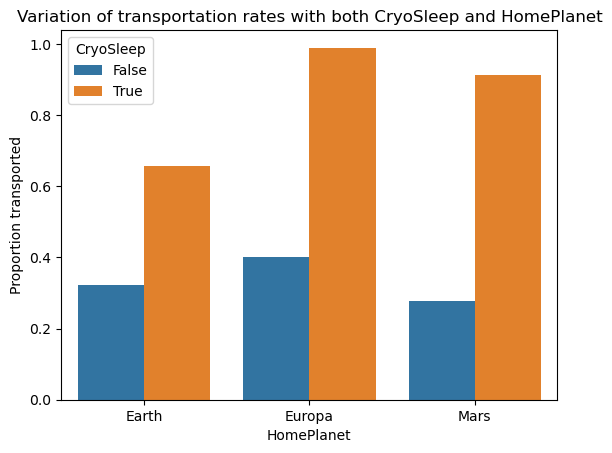

In [70]:
#combo plot of homeplanet and cryosleep
plot_cmb = df.groupby(['HomePlanet', 'CryoSleep'])['Transported'].mean().reset_index()
sns.barplot(x = 'HomePlanet', y = 'Transported', data = plot_cmb, hue = 'CryoSleep', errorbar = None)
plt.ylabel('Proportion transported')
plt.title('Variation of transportation rates with both CryoSleep and HomePlanet')
#the variation seen across the previous plots is maintained
#passengers are transported the most when they ahve opted for CryoSleep and are from Europa